# 타이타닉 연습문제2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
df = pd.read_csv("../etc/titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 1. survived 컬럼을 그룹화 -> age 열 평균을 구하여 비교

In [5]:
pd.DataFrame(df.groupby(["Survived"])['Age'].mean())

,Age
Survived,
0,30.626179
1,28.343690


## 2. fare의 평균(임계값) -> fare 열 값을 이진화

In [6]:
fare = np.array(df['Fare']).reshape(-1, 1)

In [7]:
Binarizer(threshold=df["Fare"].mean()).fit_transform(fare)

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

## 3. embarked 컬럼값에 대해 각 승선항 별 승선인원수

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 4. sibsp 컬럼값에 대해 표준화

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

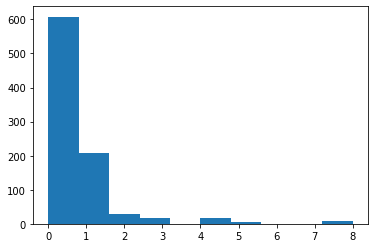

In [9]:
plt.hist(df['SibSp']) #이상치가 있는 히스토그램

{'whiskers': [<matplotlib.lines.Line2D at 0x2524f3c7d68>,
 'caps': [<matplotlib.lines.Line2D at 0x2524f3d9470>,
 'boxes': [<matplotlib.lines.Line2D at 0x2524a1316d8>],
 'medians': [<matplotlib.lines.Line2D at 0x2524f3d9b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2524f3d9e48>],
 'means': []}

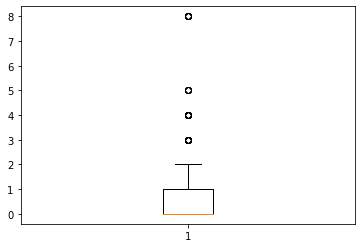

In [10]:
plt.boxplot(df['SibSp']) #이상치가 있는 박스플롯

In [11]:
#이상치 행 제거
def remove_outlier(df, columns):
    q1=np.percentile(df[columns],25)
    q3=np.percentile(df[columns],75)
    IQR=q3-q1
    
    outlier_min = q1-IQR*1.5 
    outlier_max = q3+IQR*1.5 
    
    remove_index = df[(df[columns]<outlier_min)|(df[columns]>outlier_max)].index
    df.drop(remove_index, inplace=True)
    return df

In [12]:
#표준화
def standardization(df_columns):
    df_columns = RobustScaler().fit_transform(np.array(df_columns).reshape(-1, 1))
    return df_columns

In [13]:
""" 이상치 제거 방식 3가지 """

# IQR을 이용한 이상치 제거
print(len(remove_outlier(df.copy(), "SibSp")))
#zscore을 이용한 이상치 제거
print(len(df[pd.Series(stats.zscore(df['SibSp'])).between(-2, 2)]))
#표준화 함수를 이용한 이상치 제거
print(len(df[pd.Series(RobustScaler().fit_transform(np.array(df['SibSp']).reshape(-1, 1)).reshape(1, -1)[0]).between(-2, 2)]))

845
845
845


In [14]:
"""이상치 제거"""
# 1
df = remove_outlier(df.copy(), "SibSp")
# # 2
# df = df[(stats.zscore(df['SibSp'])<=2)  & (stats.zscore(df['SibSp'])>=-2)]
# # 3
# SibSp_rs = RobustScaler().fit_transform(np.array(df['SibSp']).reshape(-1, 1)).reshape(1, -1)[0]
# df = df[(SibSp_rs<=2) & (SibSp_rs>=-2)]

(array([608.,   0.,   0.,   0.,   0., 209.,   0.,   0.,   0.,  28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

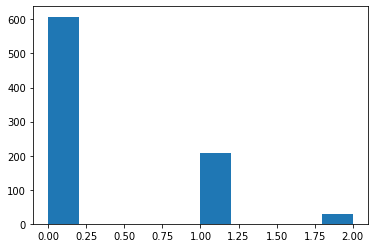

In [15]:
#IQR|zcore로 이상치 제거 후 히스토그램
plt.hist(df['SibSp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2524f4cae80>,
 'caps': [<matplotlib.lines.Line2D at 0x2524f4da588>,
 'boxes': [<matplotlib.lines.Line2D at 0x2524f4caa58>],
 'medians': [<matplotlib.lines.Line2D at 0x2524f4dac18>],
 'fliers': [<matplotlib.lines.Line2D at 0x2524f4daf60>],
 'means': []}

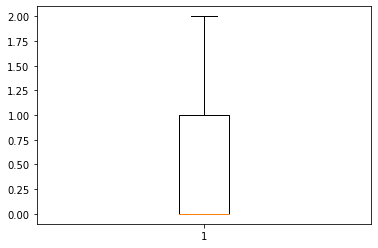

In [16]:
#IQR|zscore로 이상치 제거 후 박스플롯
plt.boxplot(df['SibSp'])

## 5. parch 컬럼값에 대해 표준화

In [17]:
df = remove_outlier(df.copy(), "Parch")

(array([  0.,   0.,   0.,   0.,   0., 676.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

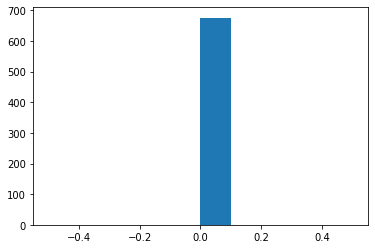

In [18]:
plt.hist(standardization(df['Parch']))

## 6. fare 컬럼값에 대해 표준화

In [19]:
df = remove_outlier(df.copy(), "Fare")

(array([ 17., 337.,  92.,  24.,  42.,  43.,  10.,   5.,   1.,  20.]),
 array([-1.07943925, -0.41775701,  0.24392523,  0.90560748,  1.56728972,
         2.22897196,  2.89065421,  3.55233645,  4.21401869,  4.87570093,
         5.53738318]),
 <a list of 10 Patch objects>)

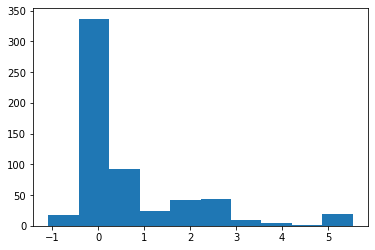

In [20]:
plt.hist(standardization(df['Fare']))

## 7. pclass와 survived 간에 상관관계 및 해석

In [21]:
df_temp = df[['Pclass', 'Survived']]

In [22]:
df_temp.corr()

,Pclass,Survived
Pclass,1.000000,-0.201775
Survived,-0.201775,1.000000


=> 결론 : pclass와 survived는 약한 음의 상관관계가 있다.

## 8. sibsp : 1, parch:2, fare:50인 승객이 있다. 이 승객은 살았을까 죽었을까?

    해결방법 예시) 3차원 공간(sibsp, parch, fare)에서 (1,2,50)의 위치와 가장 가까운 위치에 있는 데이터 11건을 검색한다.

    -> 검색된 11건의 데이터에 대한 생존여부(survived)를 추출한다
    -> 다수결로 생존여부를 판단한다

In [33]:
#거리 구하기
def SimDist_Top11(df, s, p, f):
    dist_li = []
    index_li = []
    
    for i in range(len(df)):
        dist = 0
        dist += pow(df.iloc[i]['SibSp']-s, 2)+pow(df.iloc[i]['Parch']-p, 2)+pow(df.iloc[i]['Fare']-f, 2)
        dist_li.append((sqrt(dist), i))
    
    dist_li.sort()
    
    for j in range(13):
        index_li.append(dist_li[j][1])
        
    return df.iloc[index_li]

In [24]:
def normalize_passenser(df_columns, value):
    if max(df_columns)-min(df_columns) == 0:
        return 0
    else:
        return (value-min(df_columns))/(max(df_columns)-min(df_columns))

In [25]:
#고객 정규화
norm_sibsp = normalize_passenser(df["SibSp"], 1)
norm_parch = normalize_passenser(df["Parch"], 2)
norm_fare = normalize_passenser(df["Fare"], 50)

In [34]:
#이상치를 제거한 df 정규화
mms=MinMaxScaler()
df_norm = pd.DataFrame(mms.fit_transform(df[['SibSp', 'Parch', 'Fare']]), columns=['SibSp', 'Parch', 'Fare'])
df_norm['Survived'] = df["Survived"]

In [35]:
df_top11 = SimDist_Top11(df_norm[df_norm['Survived'].notnull()], norm_sibsp, norm_parch, norm_fare)
df_top11

,SibSp,Parch,Fare,Survived
298,0.5,0.0,0.976695,1.0
443,0.5,0.0,0.979284,1.0
444,0.5,0.0,0.979284,1.0
411,0.5,0.0,0.989721,0.0
2,0.5,0.0,1.000000,1.0
495,0.5,0.0,1.000000,0.0
365,0.5,0.0,0.745763,0.0
6,0.5,0.0,0.566305,0.0
236,0.5,0.0,0.522049,0.0
39,0.5,0.0,0.489642,1.0


In [36]:
df_top11['Survived'].value_counts()

1.0    7
0.0    6
Name: Survived, dtype: int64

In [29]:
#방법2

In [37]:
#df 정규화
df_norm2 = pd.DataFrame(MinMaxScaler().fit_transform(df[['SibSp', 'Parch', 'Fare']]), columns=['SibSp', 'Parch', 'Fare'])

In [38]:
def cal_dist(value):
    return sqrt(pow(value[['SibSp','Parch','Fare']]-[norm_sibsp,norm_parch,norm_fare],2).sum())


df_norm2['Dist'] = df_norm2.apply(cal_dist, axis=1)
df_norm2['Survived'] = df['Survived']
df_norm2 = df_norm2.sort_values('Dist')
df_norm2_top11 = df_norm2[df_norm2.Survived.notnull()][:13]
df_norm2_top11

,SibSp,Parch,Fare,Dist,Survived
298,0.5,0.0,0.976695,0.035075,1.0
443,0.5,0.0,0.979284,0.037665,1.0
444,0.5,0.0,0.979284,0.037665,1.0
411,0.5,0.0,0.989721,0.048102,0.0
495,0.5,0.0,1.000000,0.058380,0.0
2,0.5,0.0,1.000000,0.058380,1.0
365,0.5,0.0,0.745763,0.195857,0.0
6,0.5,0.0,0.566305,0.375315,0.0
236,0.5,0.0,0.522049,0.419571,0.0
208,0.5,0.0,0.489642,0.451977,1.0


In [39]:
df_norm2_top11['Survived'].value_counts()

1.0    7
0.0    6
Name: Survived, dtype: int64

=> 결론 : 정규화 된 3차원 공간에서 가장 가까운 위치에 있던 13명 중 7명이 생존하였으므로 해당 승객은 생존하였다.